In [12]:
pip install opencv-python

     --------------------------------------- 38.6/38.6 MB 18.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 8.7 MB/s eta 0:00:00
     ------------------------------------- 413.4/413.4 kB 26.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 28.4 MB/s eta 0:00:00
     ------------------------------------- 440.8/440.8 kB 28.7 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 29.7 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 30.4 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 27.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 21.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ----------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.18.1 requires typing_extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.5.2 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.14.5 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [14]:
import numpy as np
import os
import pathlib
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [15]:
images_path = pathlib.Path(r"C:\Users\12039\Documents\Python 6545\leedsbutterfly\images")
segs_path = pathlib.Path(r"C:\Users\12039\Documents\Python 6545\leedsbutterfly\segmentations")

In [16]:
images_name_list = os.listdir(images_path)
segs_name_list = os.listdir(segs_path)

In [17]:
images_shape = []
for image_name in images_name_list:
    image = cv2.imread(os.path.join(images_path, image_name), cv2.IMREAD_GRAYSCALE)
    images_shape.append(image.shape)

# Now, images_shape will contain the shapes of the grayscale images


In [18]:
images_shape = pd.DataFrame(images_shape, columns=["row size", "col size"])
images_shape.head()

,row size,col size
0,768,1024
1,453,640
2,600,840
3,600,840
4,424,636


In [19]:
images_shape.describe()

,row size,col size
count,832.000000,832.000000
mean,477.626202,632.060096
std,302.858573,423.397972
min,99.000000,134.000000
25%,300.000000,400.000000
50%,409.000000,500.000000
75%,556.250000,750.000000
max,2328.000000,3480.000000


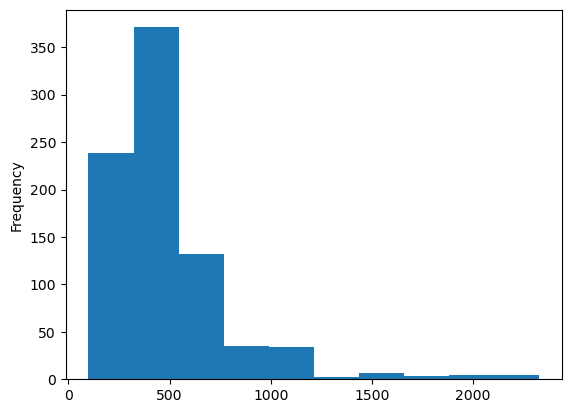

In [20]:
images_shape["row size"].plot(kind="hist")
plt.show()

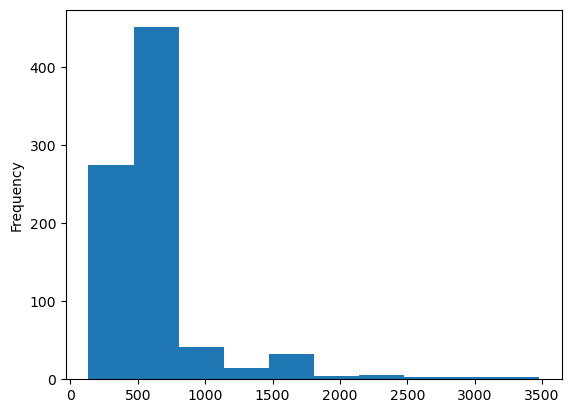

In [21]:
images_shape["col size"].plot(kind="hist")
plt.show()

In [23]:
# reshapeinto is (256, 256)
image_shape = (256, 256)

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory

# Read images
train_data_imgs = image_dataset_from_directory(
    images_path._str,
    labels=None,
    label_mode=None,
    color_mode="rgb",
    batch_size=32,
    image_size=image_shape,
    shuffle=True,
    seed=39,
    validation_split=0.2,
    subset="training"
)
test_data_imgs = image_dataset_from_directory(
    images_path._str,
    labels=None,
    label_mode=None,
    color_mode="rgb",
    batch_size=32,
    image_size=image_shape,
    shuffle=False,
    seed=39,
    validation_split=0.2,
    subset="validation"
)

# Read segmentations
train_data_segs = image_dataset_from_directory(
    segs_path._str,
    labels=None,
    label_mode=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=image_shape,
    shuffle=True,
    seed=39,
    validation_split=0.2,
    subset="training"
)
test_data_segs = image_dataset_from_directory(
    segs_path._str,
    labels=None,
    label_mode=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=image_shape,
    shuffle=False,
    seed=39,
    validation_split=0.2,
    subset="validation"
)

ModuleNotFoundError: No module named 'tensorflow'